<a href="https://colab.research.google.com/github/hg15200/Clase/blob/main/Practica_3_HectorGutierrezArance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src=https://static.casadomo.com/media/2020/02/lonmark-espana-universidad-valencia-jornada-automatizacion.png width="300">


# Procesado de Señal

# Práctica 3


# Análisis y Descomposición de señales

#  **Transformadas adaptadas** 
**Análisis en Componentes Principales (PCA)**

**INTRO:**
Vale la pena mirar el siguiente link para entender el PCA

https://setosa.io/ev/principal-component-analysis/

## 1.1 PCA "a mano"

Cargamos librerias


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Descargamos los datos de los datasets de sklearn

In [2]:
iris = datasets.load_iris()
X = iris.data

In [3]:
X.shape

(150, 4)

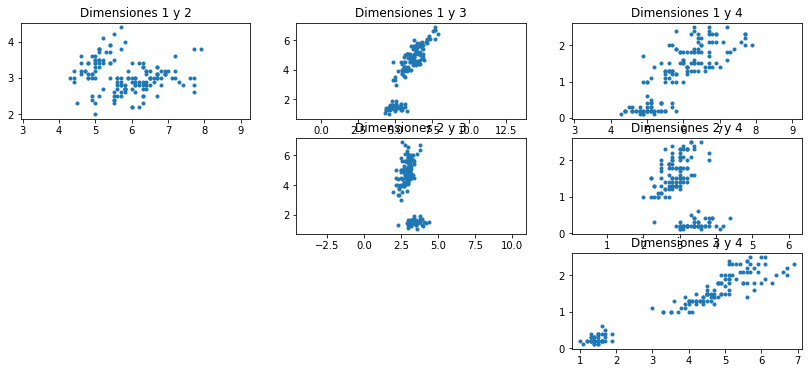

In [5]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(14,6))
plt.subplot(3,3,1), plt.plot(X[:,0],X[:,1],'.'), plt.axis('equal') ,plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,2), plt.plot(X[:,0],X[:,2],'.'), plt.axis('equal') ,plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,3), plt.plot(X[:,0],X[:,3],'.'), plt.axis('equal') ,plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,5), plt.plot(X[:,1],X[:,2],'.'), plt.axis('equal') ,plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,6), plt.plot(X[:,1],X[:,3],'.'), plt.axis('equal') ,plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,9), plt.plot(X[:,2],X[:,3],'.'), plt.axis('equal') ,plt.title('Dimensiones 3 y 4');

### Aplicamos el PCA

#### Restamos la media

In [22]:
m = np.mean(X, axis = 0)
Xm = X - m[np.newaxis,:]

In [23]:
# Esta es la media
m

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

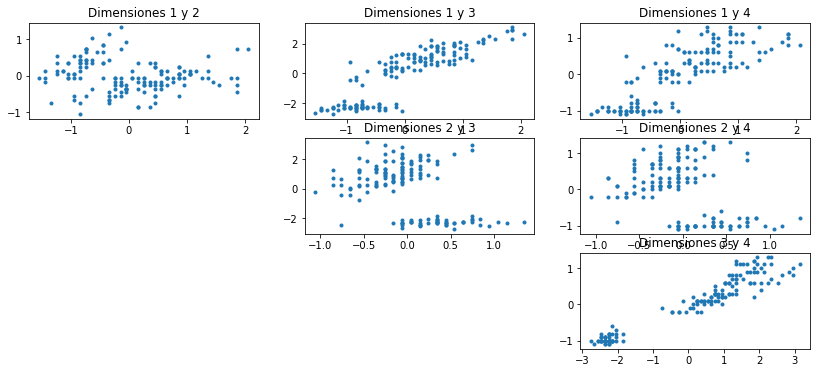

In [24]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(14,6))
plt.subplot(3,3,1), plt.plot(Xm[:,0],Xm[:,1],'.'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,2), plt.plot(Xm[:,0],Xm[:,2],'.'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,3), plt.plot(Xm[:,0],Xm[:,3],'.'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,5), plt.plot(Xm[:,1],Xm[:,2],'.'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,6), plt.plot(Xm[:,1],Xm[:,3],'.'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,9), plt.plot(Xm[:,2],Xm[:,3],'.'), plt.title('Dimensiones 3 y 4');

#### Calculamos la matriz de covarianza

In [25]:
cov_matrix = np.dot(Xm.T, Xm) / Xm.shape[0]

In [26]:
# Esta es la matriz de covarianza
cov_matrix

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

#### Obtenemos los autovalores y autovectores de la matriz de covarianza

In [27]:
evals, evecs = np.linalg.eigh(cov_matrix)

In [28]:
#Autovectores
evecs

array([[ 0.31548719,  0.58202985,  0.65658877, -0.36138659],
       [-0.3197231 , -0.59791083,  0.73016143,  0.08452251],
       [-0.47983899, -0.07623608, -0.17337266, -0.85667061],
       [ 0.75365743, -0.54583143, -0.07548102, -0.3582892 ]])

In [29]:
#Autovalores
evals

array([0.02367619, 0.0776881 , 0.24105294, 4.20005343])

In [30]:
# Ordenamos los autovectores de mayor a menor autovalor
idx = np.argsort(-evals)
evecs = evecs[:,idx]

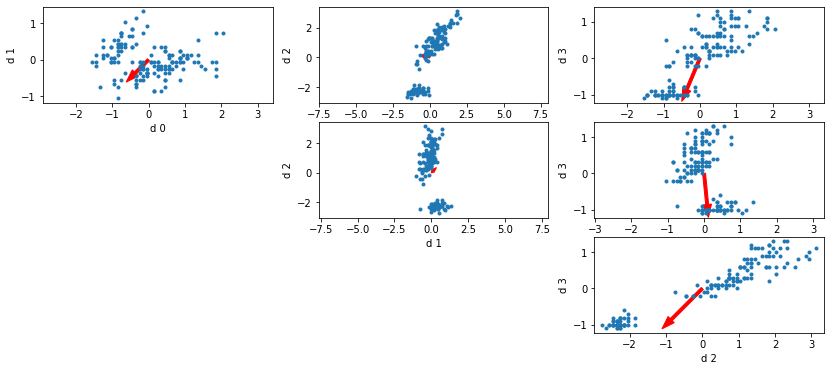

In [31]:
# Primera componente principal
# Mostramos las combinaciones de dimensiones 2 a 2
# Primera componente principal
# Mostramos las combinaciones de dimensiones 2 a 2
color='red'
arrow = lambda v, d1, d2: \
    ax[d1,d2].arrow(0, 0, evecs[d1,v], evecs[d2,v], width=0.08, ec=color, fc=color, color=color)

def splot(x, d1, d2):
    ejes = ax[d1,d2-1]
    ejes.plot(x[:,d1],x[:,d2],'.')
    ejes.axis('auto')  # 'square', 'image', 'equal', 'scaled'
    # ejes.set_title('dims %d y %d' % (d1+1, d2+1))
    ejes.set_xlabel('d %d' % d1)
    ejes.set_ylabel('d %d' % d2)
    ejes.axis('equal')

# Representamos los datos
# plt.figure(figsize=(14,6))
_, ax = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(14,6))

splot(Xm, 0, 1)
splot(Xm, 0, 2)
splot(Xm, 0, 3)
splot(Xm, 1, 2)
splot(Xm, 1, 3)
splot(Xm, 2, 3)

ax[1,0].axis('off')
ax[2,0].axis('off')
ax[2,1].axis('off')

# Superponemos direcciones autovectores
arrow(0, 0, 0)
arrow(0, 0, 1)
arrow(0, 0, 2)
arrow(0, 1, 1)
arrow(0, 1, 2)
arrow(0, 2, 2);

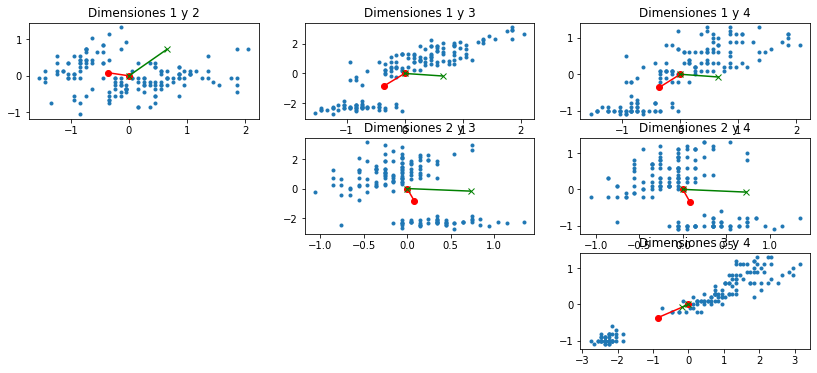

In [32]:
# Primera componente principal
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(14,6))
plt.subplot(3,3,1), plt.plot(Xm[:,0],Xm[:,1],'.'), plt.title('Dimensiones 1 y 2')
plt.plot([0,evecs[0,0]],[0,evecs[1,0]],'ro-')
plt.plot([0,evecs[0,1]],[0,evecs[1,1]],'gx-')
plt.subplot(3,3,2), plt.plot(Xm[:,0],Xm[:,2],'.'), plt.title('Dimensiones 1 y 3')
plt.plot([0,evecs[0,0]],[0,evecs[2,0]],'ro-')
plt.plot([0,evecs[0,1]],[0,evecs[2,1]],'gx-')
plt.subplot(3,3,3), plt.plot(Xm[:,0],Xm[:,3],'.'), plt.title('Dimensiones 1 y 4')
plt.plot([0,evecs[0,0]],[0,evecs[3,0]],'ro-')
plt.plot([0,evecs[0,1]],[0,evecs[3,1]],'gx-')
plt.subplot(3,3,5), plt.plot(Xm[:,1],Xm[:,2],'.'), plt.title('Dimensiones 2 y 3')
plt.plot([0,evecs[1,0]],[0,evecs[2,0]],'ro-')
plt.plot([0,evecs[1,1]],[0,evecs[2,1]],'gx-')
plt.subplot(3,3,6), plt.plot(Xm[:,1],Xm[:,3],'.'), plt.title('Dimensiones 2 y 4')
plt.plot([0,evecs[1,0]],[0,evecs[3,0]],'ro-')
plt.plot([0,evecs[1,1]],[0,evecs[3,1]],'gx-')
plt.subplot(3,3,9), plt.plot(Xm[:,2],Xm[:,3],'.'), plt.title('Dimensiones 3 y 4')
plt.plot([0,evecs[2,0]],[0,evecs[3,0]],'ro-')
plt.plot([0,evecs[2,1]],[0,evecs[3,1]],'gx-');

#### Aplicamos los autovectores (rotamos los datos)

In [33]:
Xpca = np.dot(evecs.T, Xm.T).T

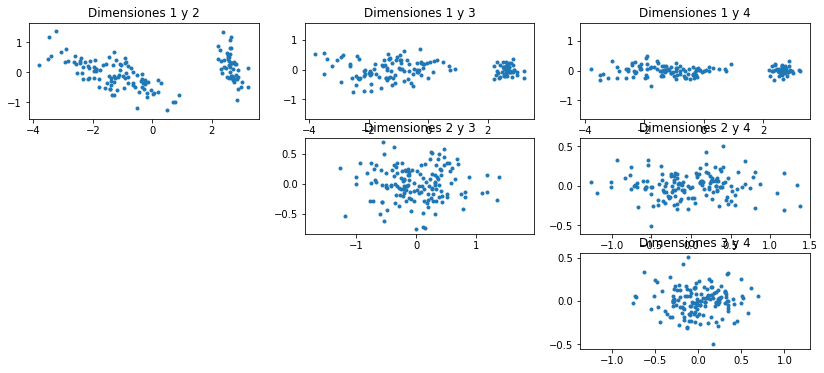

In [34]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(14,6))
plt.subplot(3,3,1), plt.plot(Xpca[:,0],Xpca[:,1],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,2), plt.plot(Xpca[:,0],Xpca[:,2],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,3), plt.plot(Xpca[:,0],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,5), plt.plot(Xpca[:,1],Xpca[:,2],'.'),plt.axis('equal'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,6), plt.plot(Xpca[:,1],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,9), plt.plot(Xpca[:,2],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 3 y 4');

In [35]:
cov_pca = np.dot(Xpca.T, Xpca) / Xpca.shape[0]


<ipython-input-36-a8b60afa14c2>:2: RuntimeWarning: invalid value encountered in power
  plt.imshow(np.abs(cov_pca**0.75))


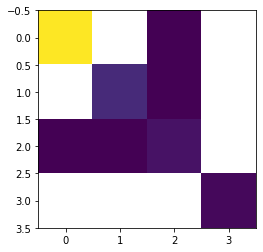

In [36]:
#Esta es la matriz de covarianza de los datos despuéés de aplicar el PCA
plt.imshow(np.abs(cov_pca**0.75))

In [37]:
cov_pca

array([[ 4.20005343e+00, -9.51123685e-16,  3.59800328e-16,
        -9.17981094e-16],
       [-9.51123685e-16,  2.41052943e-01,  1.67709934e-16,
        -3.86673963e-16],
       [ 3.59800328e-16,  1.67709934e-16,  7.76881034e-02,
        -1.08784118e-16],
       [-9.17981094e-16, -3.86673963e-16, -1.08784118e-16,
         2.36761924e-02]])

## 1.2 PCA usando sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [38]:
from sklearn import decomposition

In [39]:
model_pca = decomposition.PCA(n_components=4)

In [40]:
model_pca.fit(X)

PCA(n_components=4)

In [41]:
Xpca = model_pca.transform(X)

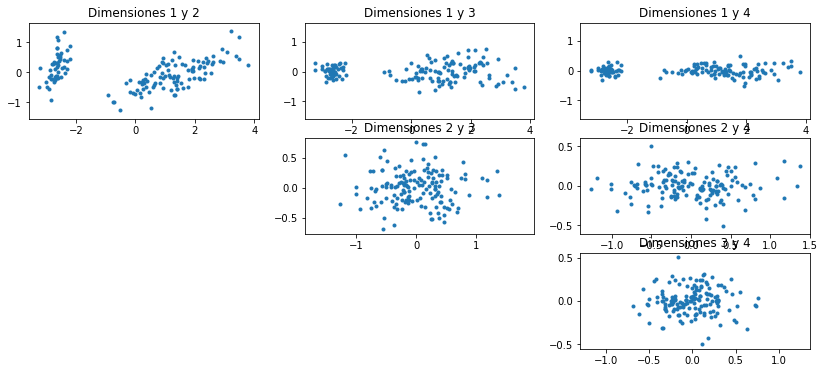

In [42]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(14,6))
plt.subplot(3,3,1), plt.plot(Xpca[:,0],Xpca[:,1],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,2), plt.plot(Xpca[:,0],Xpca[:,2],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,3), plt.plot(Xpca[:,0],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,5), plt.plot(Xpca[:,1],Xpca[:,2],'.'),plt.axis('equal'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,6), plt.plot(Xpca[:,1],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,9), plt.plot(Xpca[:,2],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 3 y 4');

## EJERCICIOS

#### Ejercicio 1: 
Resume lo mas que puedas en una celda los pasos imprescindibles para aplicar PCA "a mano". Comenta cada linea.

In [45]:
# Centramos los datos
m = np.mean(X, axis = 0)
Xm = X - m[np.newaxis,:]
# Calculamos la matriz de covarianza
cov_matrix = np.dot(Xm.T, Xm) / Xm.shape[0]
# Obtenemos los autovalores y autovectores
evals, evecs = np.linalg.eigh(cov_matrix)
# Ordenamos los autovectores de mayor a menor autovalor
idx = np.argsort(-evals)
evecs = evecs[:,idx]
# Aplicamos los autovectores
Xpca = np.dot(evecs.T, Xm.T).T

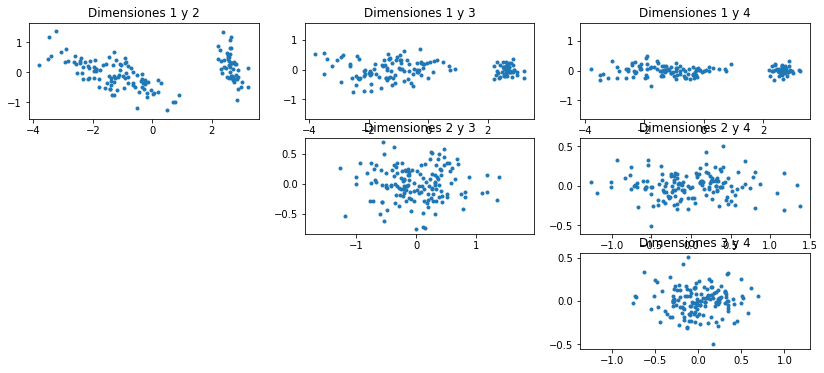

In [46]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(14,6))
plt.subplot(3,3,1), plt.plot(Xpca[:,0],Xpca[:,1],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,2), plt.plot(Xpca[:,0],Xpca[:,2],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,3), plt.plot(Xpca[:,0],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,5), plt.plot(Xpca[:,1],Xpca[:,2],'.'),plt.axis('equal'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,6), plt.plot(Xpca[:,1],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,9), plt.plot(Xpca[:,2],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 3 y 4');

#### Ejercicio 2: 
Aplica PCA "a mano" a los datos de Boston. Explica cada paso.

In [47]:
boston = datasets.load_boston()
X = boston.data

# Centramos los datos
m = np.mean(X, axis = 0)
Xm = X - m[np.newaxis,:]
# Calculamos la matriz de covarianza
cov_matrix = np.dot(Xm.T, Xm) / Xm.shape[0]
# Obtenemos los autovalores y autovectores
evals, evecs = np.linalg.eigh(cov_matrix)
# Ordenamos los autovectores de mayor a menor autovalor
idx = np.argsort(-evals)
evecs = evecs[:,idx]
# Aplicamos los autovectores
Xpca = np.dot(evecs.T, Xm.T).T

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

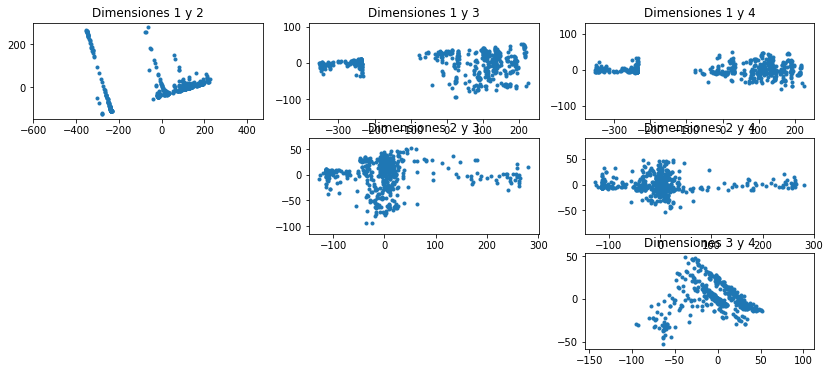

In [48]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(14,6))
plt.subplot(3,3,1), plt.plot(Xpca[:,0],Xpca[:,1],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,2), plt.plot(Xpca[:,0],Xpca[:,2],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,3), plt.plot(Xpca[:,0],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,5), plt.plot(Xpca[:,1],Xpca[:,2],'.'),plt.axis('equal'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,6), plt.plot(Xpca[:,1],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,9), plt.plot(Xpca[:,2],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 3 y 4');

#### Ejercicio 3: 
Aplica PCA usando sklearn a los datos de Boston. Explica cada paso.

In [49]:
boston = datasets.load_boston()
X = boston.data
# Definimos el modelo del PCA
model_pca = decomposition.PCA(n_components=4)
# Entrenamos el modelo
model_pca.fit(X)
# Aplicamos el modelo
Xpca = model_pca.transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

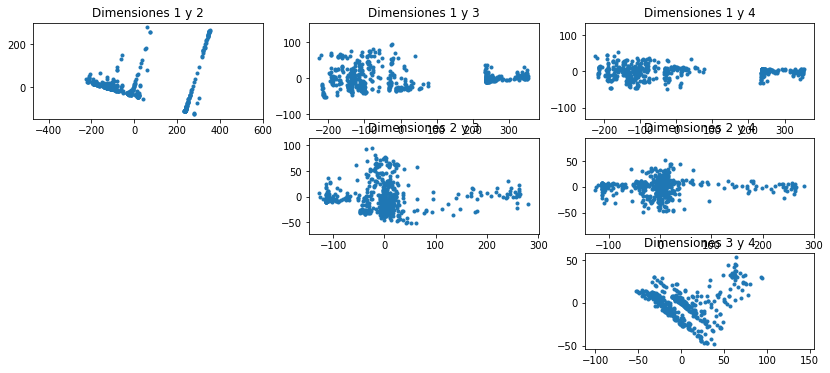

In [50]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(14,6))
plt.subplot(3,3,1), plt.plot(Xpca[:,0],Xpca[:,1],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,2), plt.plot(Xpca[:,0],Xpca[:,2],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,3), plt.plot(Xpca[:,0],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,5), plt.plot(Xpca[:,1],Xpca[:,2],'.'),plt.axis('equal'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,6), plt.plot(Xpca[:,1],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,9), plt.plot(Xpca[:,2],Xpca[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 3 y 4');

#### Ejercicio 4: 
¿Que otras descomposiciones hay en "sklearn.decomposition" que conozcas?
Elige una, pruébala y explícala.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition


In [59]:
boston = datasets.load_boston()
X = boston.data
from sklearn.decomposition import FastICA
# Definimos el modelo del PCA
model_ica = decomposition.FastICA(n_components=16)
# Entrenamos el modelo
model_ica.fit(X)
# Aplicamos el modelo
Xica = model_ica.transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

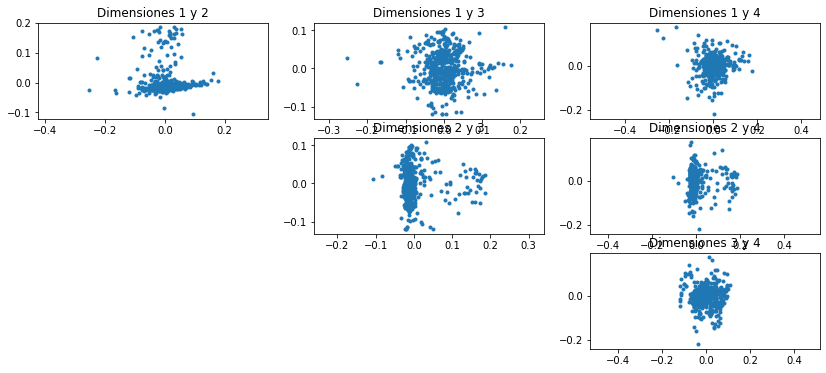

In [60]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(14,6))
plt.subplot(3,3,1), plt.plot(Xica[:,0],Xica[:,1],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,2), plt.plot(Xica[:,0],Xica[:,2],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,3), plt.plot(Xica[:,0],Xica[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,5), plt.plot(Xica[:,1],Xica[:,2],'.'),plt.axis('equal'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,6), plt.plot(Xica[:,1],Xica[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,9), plt.plot(Xica[:,2],Xica[:,3],'.'),plt.axis('equal'), plt.title('Dimensiones 3 y 4');

#### Ejercicio extra: 
Haz el PCA a bloques de 4x4 en una imagen de blanco y negro. ¿Quéé pinta tienen los autovectores?


## Comprimiendo (PCA)

En este ejemplo hacemos un compresor de imágenes usando PCA

In [61]:
# Estas funciones me las he descargado de interné
# Son para pasar de imagen a patches y de patches a imagen
# http://jamesgregson.ca/extract-image-patches-in-python.html

def extract_grayscale_patches( img, shape, offset=(0,0), stride=(1,1) ):
    """Extracts (typically) overlapping regular patches from a grayscale image

    Changing the offset and stride parameters will result in images
    reconstructed by reconstruct_from_grayscale_patches having different
    dimensions! Callers should pad and unpad as necessary!

    Args:
        img (HxW ndarray): input image from which to extract patches

        shape (2-element arraylike): shape of that patches as (h,w)

        offset (2-element arraylike): offset of the initial point as (y,x)

        stride (2-element arraylike): vertical and horizontal strides

    Returns:
        patches (ndarray): output image patches as (N,shape[0],shape[1]) array

        origin (2-tuple): array of top and array of left coordinates
    """
    px, py = np.meshgrid( np.arange(shape[1]),np.arange(shape[0]))
    l, t = np.meshgrid(
        np.arange(offset[1],img.shape[1]-shape[1]+1,stride[1]),
        np.arange(offset[0],img.shape[0]-shape[0]+1,stride[0]) )
    l = l.ravel()
    t = t.ravel()
    x = np.tile( px[None,:,:], (t.size,1,1)) + np.tile( l[:,None,None], (1,shape[0],shape[1]))
    y = np.tile( py[None,:,:], (t.size,1,1)) + np.tile( t[:,None,None], (1,shape[0],shape[1]))
    return img[y.ravel(),x.ravel()].reshape((t.size,shape[0],shape[1])), (t,l)

def reconstruct_from_grayscale_patches( patches, origin, epsilon=1e-12 ):
    """Rebuild an image from a set of patches by averaging

    The reconstructed image will have different dimensions than the
    original image if the strides and offsets of the patches were changed
    from the defaults!

    Args:
        patches (ndarray): input patches as (N,patch_height,patch_width) array

        origin (2-tuple): top and left coordinates of each patch

        epsilon (scalar): regularization term for averaging when patches
            some image pixels are not covered by any patch

    Returns:
        image (ndarray): output image reconstructed from patches of
            size ( max(origin[0])+patches.shape[1], max(origin[1])+patches.shape[2])

        weight (ndarray): output weight matrix consisting of the count
            of patches covering each pixel
    """
    patch_width  = patches.shape[2]
    patch_height = patches.shape[1]
    img_width    = np.max( origin[1] ) + patch_width
    img_height   = np.max( origin[0] ) + patch_height

    out = np.zeros( (img_height,img_width) )
    wgt = np.zeros( (img_height,img_width) )
    for i in range(patch_height):
        for j in range(patch_width):
            out[origin[0]+i,origin[1]+j] += patches[:,i,j]
            wgt[origin[0]+i,origin[1]+j] += 1.0

    return out/np.maximum( wgt, epsilon ), wgt

(-0.5, 235.5, 311.5, -0.5)

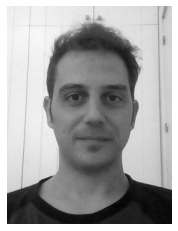

In [86]:
import requests
from PIL import Image
from io import BytesIO
url = "https://www.uv.es/lapeva/Valero_2020_DQ.png"

# Extraemos la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Pasamos la imagen a array y escala de grises
X = np.array(img)
Xg = np.mean(X[:,:,0:3],axis=2)
plt.imshow(Xg,cmap = 'gray')
plt.axis('off')

In [87]:
# Tamaño de los patches
L = 4
# Extraemos los patches de la imagen
dat, Xd = extract_grayscale_patches(Xg,(L,L),(0,0),(L,L))

In [88]:
# Tengo datos de N x L x L
dat.shape

(4602, 4, 4)

In [89]:
# Los enchurro en forma de vector N x L^2
XX = np.reshape(dat,[dat.shape[0],dat.shape[1]*dat.shape[2]])

In [90]:
XX.shape

(4602, 16)

In [91]:
# Calculamos el PCA
m = np.mean(XX, axis = 0)
Xm = XX - m[np.newaxis,:]
cov_matrix = np.dot(Xm.T, Xm) / Xm.shape[0]
evals, evecs = np.linalg.eigh(cov_matrix)

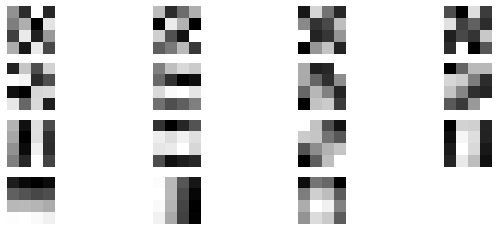

In [92]:
# Mostramos los autovectores en forma de patches
plt.figure(figsize=(10,4))
for i in np.arange(1,L*L):
    plt.subplot(L,L,i)
    plt.imshow(np.reshape(evecs[:,i]+0.5,[L,L]),cmap='gray')
    plt.axis('off')

In [93]:
# Aplicamos la transformacion PCA
Xpca = np.dot(evecs.T, Xm.T).T

In [94]:
# Aplicamos reduccion dimensionalidad, nos quedamos con M componentes
M = 8
Xpca_2 = Xpca
Xpca_2[:,:-M] = 0 

In [95]:
# Invertimos PCA
X_rec = np.dot(evecs, Xpca_2.T).T

In [96]:
# Reordenamos los datos en forma de imagen
dat_rec= np.reshape(X_rec,dat.shape)
Im, extra = reconstruct_from_grayscale_patches(dat_rec, Xd)

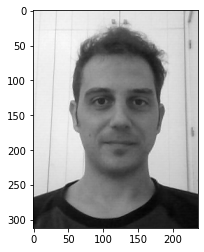

In [97]:
# Mostramos la imagen comprimida
plt.figure
plt.imshow(Im,cmap='gray')

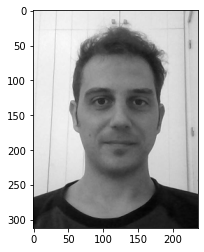

In [98]:
# Comparamos con la imagen sin comprimir
plt.figure
plt.imshow(Xg,cmap='gray')

# **Transformadas fijas** 
**Wavelets**


## Wavelets 1D

In [63]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [64]:
t = np.linspace(-1, 1, 200, endpoint=False)

sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)

widths = np.arange(1, 31)


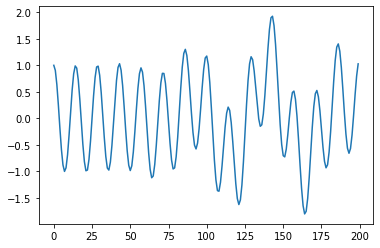

In [65]:
plt.plot(sig)

In [99]:
cwtmatr = signal.cwt(sig, signal.ricker, widths)

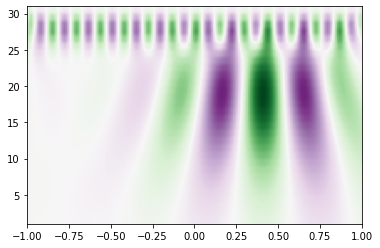

In [100]:
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',

           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

## Wavelets 2D 

In [66]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data

In [67]:

# Load image
original = pywt.data.camera()

In [68]:
# Wavelet transform of image
coeffs2 = pywt.dwt2(original, 'bior1.3')

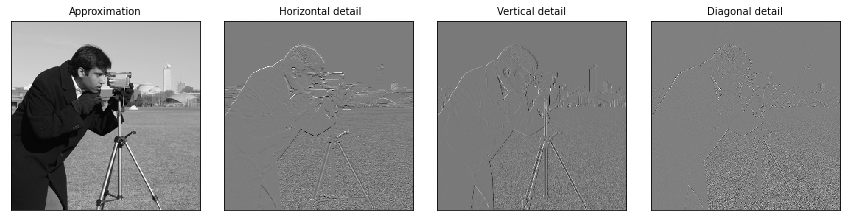

In [69]:
# plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

## Denoising (wavelets)

In [70]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio

In [71]:
original = img_as_float(data.chelsea()[100:250, 50:300])

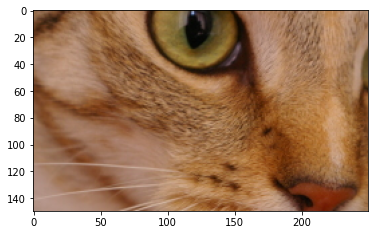

In [72]:
plt.figure
plt.imshow(original)

In [73]:
sigma = 0.12
noisy = random_noise(original, var=sigma**2)


In [74]:

sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

Estimated Gaussian noise standard deviation = 0.11685102654844981


In [75]:
# Denoising
im_bayes = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)

im_visushrink = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est, rescale_sigma=True)

In [76]:
# Compute PSNR as an indication of image quality
psnr_noisy = peak_signal_noise_ratio(original, noisy)
psnr_bayes = peak_signal_noise_ratio(original, im_bayes)
psnr_visushrink = peak_signal_noise_ratio(original, im_visushrink)

(-0.5, 249.5, 149.5, -0.5)

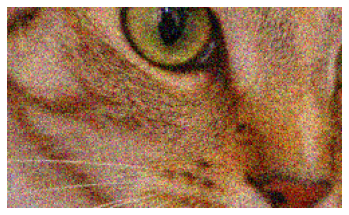

In [77]:
plt.imshow(noisy)
plt.axis('off')

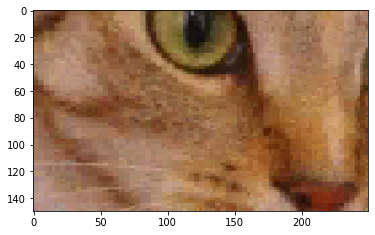

In [83]:
plt.imshow(im_bayes)
#ax[0, 1].axis('off')

(-0.5, 249.5, 149.5, -0.5)

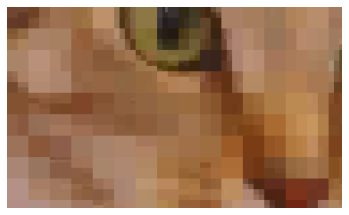

In [84]:
plt.imshow(im_visushrink)
plt.axis('off')

(-0.5, 249.5, 149.5, -0.5)

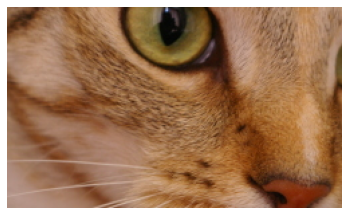

In [85]:
plt.imshow(original)
plt.axis('off')